<a href="https://colab.research.google.com/github/Noctua28/Prediction-of-Product-Sales/blob/main/Spanish_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Source:

### [Spanish Wine Quality](https://www.kaggle.com/datasets/fedesoriano/spanish-wine-quality-dataset?resource=download) by Fedesoriano from Kaggle


## Data Dictionary:



*   **Winery**: Winery Name

*   **Wine**: Name of the wine

*   **Year**: Year in which the grapes were harvested
*   **Rating**: Average rating given to the wine by the users (in a scale of 1 to 5)


*   **Num_reviews**: Number of users that reviewed the wine


*   **Country**: Country of origin

*   **Region**: Region of the wine
*   **Price**: Price in euros

*   **Type**: Wine variety
*   **Body**: Body score, defined as the richness and weight of the wine in your mout (in a scale of 1 to 5)

*   **Acidity**: Acidity score, defines as wine's 'pucker' or tartness, it's what makes a wine refreshing (in a scale of 1 to 5)










# Target:

### The target variable of this dataset is to predict the quality of the wine.

# Regression or Classification?

This will be treated as a regression to predict the quality of the wine to make financial decisions on investment in supply and production.

## Loading Dataset:

In [71]:
# Import Libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.decomposition import TruncatedSVD

In [72]:
# Loading dataset
df = pd.read_csv('/content/drive/MyDrive/Data Science Boot Camp/Machine Learning Introduction/W3 - Classification Models/wines_SPA.csv')
print(df.head(10))

          winery                            wine  year  rating  num_reviews  \
0  Teso La Monja                           Tinto  2013     4.9           58   
1         Artadi                   Vina El Pison  2018     4.9           31   
2   Vega Sicilia                           Unico  2009     4.8         1793   
3   Vega Sicilia                           Unico  1999     4.8         1705   
4   Vega Sicilia                           Unico  1996     4.8         1309   
5   Vega Sicilia                           Unico  1998     4.8         1209   
6   Vega Sicilia                           Unico  2010     4.8         1201   
7   Vega Sicilia                           Unico  1995     4.8          926   
8   Vega Sicilia  Unico Reserva Especial Edicion  2015     4.8          643   
9   Vega Sicilia                           Unico  2011     4.8          630   

  country            region   price                  type  body  acidity  
0  Espana              Toro  995.00              Toro R

# Dataset Review, Clean up, & Preparation

In [73]:
# Feature analysis
num_features = df.shape[1]
print("Number of Features", num_features)

Number of Features 11


In [74]:
# Data depth analysis
num_rows = df.shape[0]
print("Number of rows", num_rows)

Number of rows 7500


In [75]:
# Data type analysis

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [76]:
# Investigating why year is object when it should be int64
print(df['year'].unique())

# Addressing issue with the year col

df['year'] = df['year'].replace('N.V.', np.nan).astype(float).astype('Int64')

print(df.dtypes)

['2013' '2018' '2009' '1999' '1996' '1998' '2010' '1995' '2015' '2011'
 '2016' '1970' '1946' '1962' '2019' '2004' 'N.V.' '1931' '1979' '2005'
 '2020' '2014' '1985' '1929' '2007' '2012' '2017' '2008' nan '2006' '2000'
 '2003' '2002' '1991' '1994' '1990' '1989' '1987' '1986' '1981' '2001'
 '1968' '1964' '1982' '1974' '1983' '1955' '1980' '1972' '1953' '1958'
 '1942' '1965' '1992' '1973' '1997' '1967' '1975' '1910' '1961' '1954'
 '1988' '1969' '1951' '1928' '1976' '1949' '2021' '1959' '1922' '1978'
 '1925']
winery          object
wine            object
year             Int64
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object


In [77]:
# Dropping the 'country' column as all wines are from Spain and this does not provide value to our work

df = df.drop('country', axis=1)

# Dropping the 'wine; column as it has a lot of values and low frequency of ocurrance.

df = df.drop('wine', axis=1)

df.head(10)

,winery,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
5,Vega Sicilia,1998,4.8,1209,Ribera del Duero,490.00,Ribera Del Duero Red,5.0,3.0
6,Vega Sicilia,2010,4.8,1201,Ribera del Duero,349.00,Ribera Del Duero Red,5.0,3.0
7,Vega Sicilia,1995,4.8,926,Ribera del Duero,810.89,Ribera Del Duero Red,5.0,3.0
8,Vega Sicilia,2015,4.8,643,Ribera del Duero,345.00,Ribera Del Duero Red,5.0,3.0
9,Vega Sicilia,2011,4.8,630,Ribera del Duero,315.00,Ribera Del Duero Red,5.0,3.0


In [78]:
# Check for duplicated rows
duplicated_rows = df.duplicated()

# Print the duplicated rows
print("Duplicated Rows:")
print(df[duplicated_rows])

## The duplicates are due to records of the same wine from the same winery but with different reviews.

Duplicated Rows:
                    winery  year  rating  num_reviews            region  \
1800        Bodega Tameran  2020     4.3           27      Gran Canaria   
2036        Ramon do Casar  2020     4.2          407           Ribeiro   
2039              Binigrau  2020     4.2          404          Mallorca   
2050          La Vicalanda  2015     4.2          420             Rioja   
2051       Enrique Mendoza  2017     4.2          420          Alicante   
...                    ...   ...     ...          ...               ...   
7495               Contino  2016     4.2          392             Rioja   
7496  Conreria d'Scala Dei  2018     4.2          390          Priorato   
7497           Mustiguillo  2017     4.2          390      El Terrerazo   
7498           Matarromera  2011     4.2          389  Ribera del Duero   
7499              Sei Solo  2016     4.2          388  Ribera del Duero   

      price                  type  body  acidity  
1800  29.75                   N

In [79]:
# Check for missing values
missing_values = df.isnull().sum()

# Addressing missing values

imputer = KNNImputer(n_neighbors=5)

df[['year', 'body', 'acidity']] = imputer.fit_transform(df[['year', 'body', 'acidity']])

# For 'type', we will fill the missing values with the most frequent value
df['type'] = df['type'].fillna(df['type'].mode()[0])

print(missing_values)

winery            0
year            290
rating            0
num_reviews       0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64


In [80]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Remove categories that appear less than 3%
def remove_categories(df, column, threshold):
    value_counts = df[column].value_counts(normalize=True)
    remove_categories = value_counts[value_counts < threshold].index
    df[column] = df[column].apply(lambda x: 'other' if x in remove_categories else x)

# Iterate over categorical columns and remove categories below the threshold
for column in categorical_columns:
    remove_categories(df, column, 0.03)

In [81]:
# Convert 'type' column to categorical with three categories

def simplify_wine_type(type_string):
    type_string = type_string.lower()
    if 'red' in type_string:
        return 'red'
    elif 'white' in type_string:
        return 'white'
    else:
        return 'other'

df['type'] = df['type'].apply(simplify_wine_type)

In [82]:
# Print the updated DataFrame
print(df)

           winery    year  rating  num_reviews            region   price  \
0           other  2013.0     4.9           58              Toro  995.00   
1          Artadi  2018.0     4.9           31    Vino de Espana  313.50   
2           other  2009.0     4.8         1793  Ribera del Duero  324.95   
3           other  1999.0     4.8         1705  Ribera del Duero  692.96   
4           other  1996.0     4.8         1309  Ribera del Duero  778.06   
...           ...     ...     ...          ...               ...     ...   
7495      Contino  2016.0     4.2          392             Rioja   19.98   
7496        other  2018.0     4.2          390          Priorato   16.76   
7497        other  2017.0     4.2          390             other   24.45   
7498  Matarromera  2011.0     4.2          389  Ribera del Duero   64.50   
7499     Sei Solo  2016.0     4.2          388  Ribera del Duero   31.63   

       type  body  acidity  
0       red   5.0      3.0  
1     other   4.0      2.0  


# Drawing Insights from the data

## Heatmap

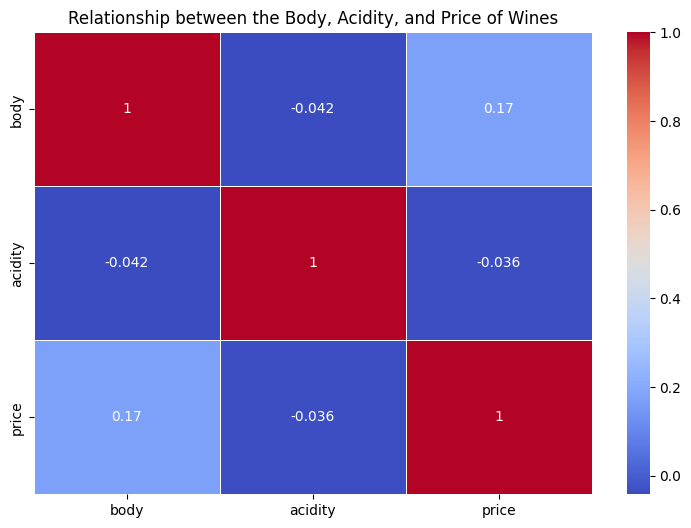

In [83]:
# Select a few features for simplicity
simple_df = df[['body', 'acidity', 'price']]

# Calculate the correlation matrix
simple_corr = simple_df.corr()

# Set up the matplotlib figure for size
f, ax = plt.subplots(figsize=(9, 6))

# Generate the heatmap
sns.heatmap(simple_corr, annot=True, cmap="coolwarm", linewidths=.5, ax=ax)

# Give the plot a title
plt.title('Relationship between the Body, Acidity, and Price of Wines')
plt.show()

### Insight

This "heatmap"  tells us how things are related to each other. Starting on the left, we have 'body', 'acidity', and 'price'. These are different aspects of a wine.

The 'body' is how heavy or light the wine feels in your mouth. The 'acidity' is how tart or sour the wine tastes. The 'price' is how much the wine costs.

The boxes show how these aspects relate to each other. If a box is more blue, it means that when one thing goes up, the other tends to go down. If a box is more red, it means that when one thing goes up, the other tends to go up too. If the box is near white, it means the two things don't really affect each other.

So, by looking at this picture, we can tell if making a wine more sour (higher acidity) tends to make it more expensive, lighter or heavier in body, and so on.

Remember, this doesn't mean that making a wine more sour will definitely change its price or body. It just tells us what tends to happen with the wines we know about.

## Scatter Plot

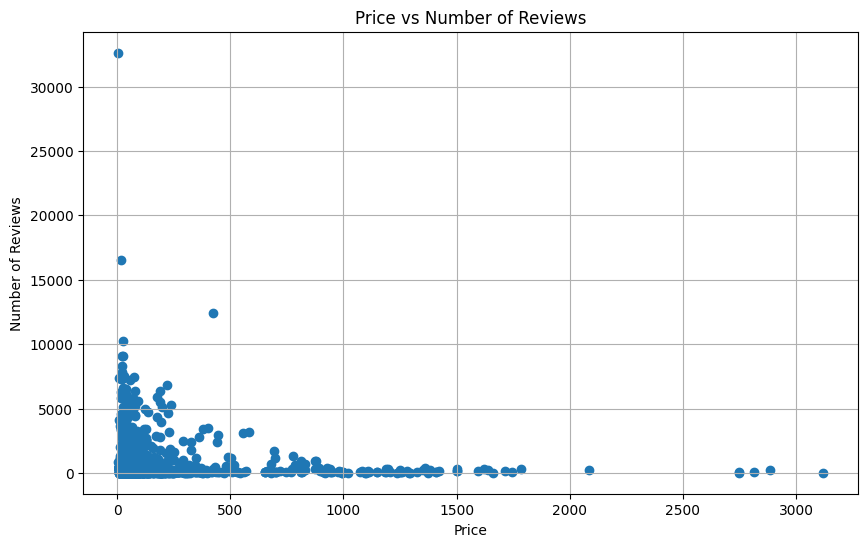

In [84]:
plt.figure(figsize=(10,6))
plt.scatter(df['price'], df['num_reviews'])
plt.title('Price vs Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

### Insight

The scatter plot is displaying the relationship between the price of each wine and the number of reviews it has received. Each dot on the plot represents an individual wine in our dataset.

Looking at the plot, it seems that wines that are less expensive, or at lower price points, tend to have more reviews. This could be for a number of reasons. One possible explanation is that more affordable wines are more accessible to a larger number of people, and therefore are likely to be purchased and reviewed more often.

Additionally, wines with a large number of reviews are likely popular, either due to their quality, their price point, or a combination of both. This popularity could drive further sales and reviews, creating a feedback loop that results in these wines having a significant number of reviews.

Conversely, wines at higher price points seem to have fewer reviews. This may be due to them being less accessible due to their cost, resulting in fewer purchases and, subsequently, fewer reviews.

However, it's important to remember that this is a broad trend, and there will be exceptions. For example, a high-priced wine could be extremely popular and have many reviews, or a low-priced wine might be less popular and have fewer reviews. Additionally, the quality of reviews (reflected in the rating) isn't accounted for in this plot - a wine with many reviews might have a low average rating, or a wine with few reviews might have a high average rating.

Finally, note that this plot doesn't account for other factors that could influence the number of reviews a wine receives, such as its brand, age, type, or the region it's from.

## Bar Plot

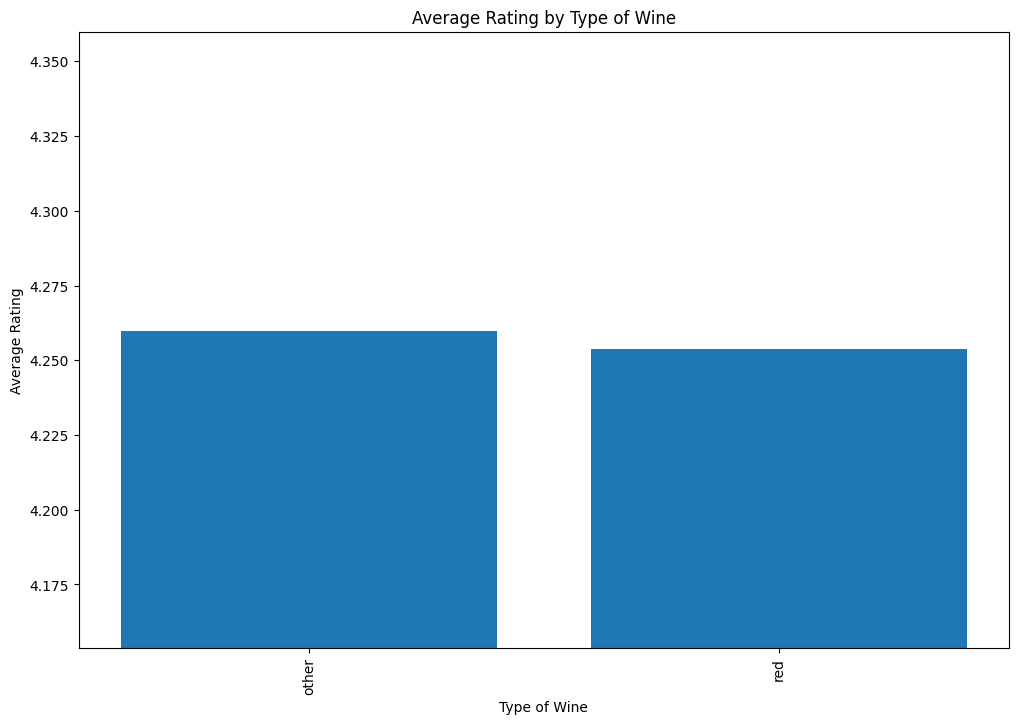

In [85]:
average_ratings = df.groupby('type')['rating'].mean().sort_values(ascending=False)[:10]  # Selecting top 10
types = average_ratings.index

plt.figure(figsize=(12,8))  # Increasing size
plt.bar(types, average_ratings)
plt.title('Average Rating by Type of Wine')
plt.xlabel('Type of Wine')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)  # Rotating x-axis labels
plt.ylim([min(average_ratings)-0.1, max(average_ratings)+0.1])  # Adjusting y limits
plt.show()

### Insight

The bar plot visualizes the average rating for each type of wine. Each bar in the plot represents a different type of wine, and the height of the bar corresponds to the average rating of that wine type.

This plot simplifies the complex world of wines into broad categories. Many other factors like the winery, region, price, and individual preferences play a massive role in a wine's rating and aren't considered in this visualization.

In summary, while this bar plot provides a clear overview of the average rating per wine type, it's just one piece of the puzzle in understanding the factors that contribute to a wine's rating.

# Modeling

In [86]:
# Pre-Processing

# Perform train-test split
X = df.drop('rating', axis=1)
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform feature scaling
numerical_features = ['year', 'num_reviews', 'price', 'body', 'acidity']
categorical_features = ['winery', 'region', 'type']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Define the pipeline with the preprocessor and regression model
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R-squared:', r2)

Mean Squared Error: 0.008183648308141486
Mean Absolute Error: 0.05255271650975597
R-squared: 0.4612698680760047


In [87]:
# Define models
models = [
    ('Linear Regression', LinearRegression(), {}),
    ('Decision Tree', DecisionTreeRegressor(), {'regressor__max_depth': [None, 5, 10]}),
    ('Random Forest', RandomForestRegressor(), {'regressor__n_estimators': [100, 200, 300], 'regressor__max_depth': [None, 5, 10]})
]

# Iterate over models
for model_name, model, params in models:
    # Define the pipeline with preprocessor and model
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('dim_reduction', TruncatedSVD()),  # Use TruncatedSVD instead of PCA
        ('regressor', model)
    ])

    # GridSearchCV to tune hyperparameters
    param_grid = {
        'dim_reduction__n_components': [2, 5, 10]  # Vary the number of components for TruncatedSVD
    }
    param_grid.update(params)  # Add the model-specific parameters

    grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
    grid_search.fit(X_train, y_train)

    # Get best estimator
    best_estimator = grid_search.best_estimator_

    # Make predictions on training and test data
    y_train_pred = best_estimator.predict(X_train)
    y_test_pred = best_estimator.predict(X_test)

    # Evaluate model with multiple metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    mse_test = mean_squared_error(y_test, y_test_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)
    r2_train = r2_score(y_train, y_train_pred)
    r2_test = r2_score(y_test, y_test_pred)

    # Display metrics
    print(f"Model: {model_name}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print("Train Set:")
    print(f"MSE: {mse_train}")
    print(f"MAE: {mae_train}")
    print(f"R-squared: {r2_train}")
    print("Test Set:")
    print(f"MSE: {mse_test}")
    print(f"MAE: {mae_test}")
    print(f"R-squared: {r2_test}")
    print("----------------------")

Model: Linear Regression
Best Parameters: {'dim_reduction__n_components': 10}
Train Set:
MSE: 0.00813270782318153
MAE: 0.059924151303582925
R-squared: 0.40227867010385177
Test Set:
MSE: 0.008998880894522703
MAE: 0.06266770781998475
R-squared: 0.4076030507504159
----------------------
Model: Decision Tree
Best Parameters: {'dim_reduction__n_components': 10, 'regressor__max_depth': 10}
Train Set:
MSE: 0.0012121414103439128
MAE: 0.013292389058226701
R-squared: 0.9109124793899799
Test Set:
MSE: 0.00427266899926395
MAE: 0.027402058863557024
R-squared: 0.7187299054199243
----------------------
Model: Random Forest
Best Parameters: {'dim_reduction__n_components': 10, 'regressor__max_depth': None, 'regressor__n_estimators': 300}
Train Set:
MSE: 0.00040427900094520123
MAE: 0.008000112433877871
R-squared: 0.9702871187127537
Test Set:
MSE: 0.0032933811435865963
MAE: 0.02449058571430135
R-squared: 0.7831964924255966
----------------------


# Model Selection for Production

After running our models to predict wine quality, we have found that the 'Random Forest' model outperforms the other two models we tested, 'Linear Regression' and 'Decision Tree'.

To arrive at this decision, we used three key measurements: Mean Squared Error (MSE), Mean Absolute Error (MAE), and R-squared.

- **Mean Squared Error (MSE)**: This is a measurement of how close our model's predictions are to the actual results. The smaller this number is, the better.

- **Mean Absolute Error (MAE)**: This measures the average absolute difference between our model's predictions and the actual values. Again, the smaller this number is, the better.

- **R-squared:** This tells us what percentage of the variations in wine quality our model is able to explain. A higher R-squared means our model can explain more of the variations and thus is more accurate.

Our 'Random Forest' model delivered the smallest MSE and MAE and the highest R-squared on our test data, meaning it was the most accurate at predicting wine quality.

The 'Random Forest' model had an R-squared value of approximately 0.78 on the test data, which implies that it can explain about 78% of the variability in wine quality based on the variables we included, such as year, number of reviews, price, body, acidity, etc.

This model could be a valuable tool for our business. For example, we could use it to predict the quality of new wines we're considering for our portfolio based on known variables. This could help us make more informed decisions and potentially reduce the risk of investing in lower-quality wines. It also means we can provide our customers with better quality wines, which can improve customer satisfaction and loyalty.

That being said, while our model is performing well, it's important to remember that no model is perfect and it should be used as a guide rather than a definitive predictor. We should continue to use our expert domain knowledge in the wine industry in conjunction with our model to make the best data informed decisions for our business.